In [33]:
import sys

sys.path.append('/Users/huberyhu/Desktop/SURP/im_deinfluence/model_code')

import networkx as nx
import experiment_framework as ef
import copy

In [34]:
graph_type = "barabasi_albert_graph"
num_nodes = 2000
influencers_cascade_steps = 4
num_influencers = 20
k_deinfluencers_ls = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  # Different values of k to test
general_cascade_steps = 3
num_avg_runs = 5

In [35]:
G = nx.barabasi_albert_graph(num_nodes, 2)
model = ef.run_influence_cascade(G, num_influencers=num_influencers, steps=influencers_cascade_steps, selection_method='random')
num_edges = G.number_of_edges()

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 1293
Number of deinfluenced nodes: 0
Number of susceptible nodes: 707
influencer {6, 405, 807, 44, 1712, 1589, 567, 57, 320, 323, 708, 344, 1115, 476, 1892, 228, 113, 373, 1526, 1918}


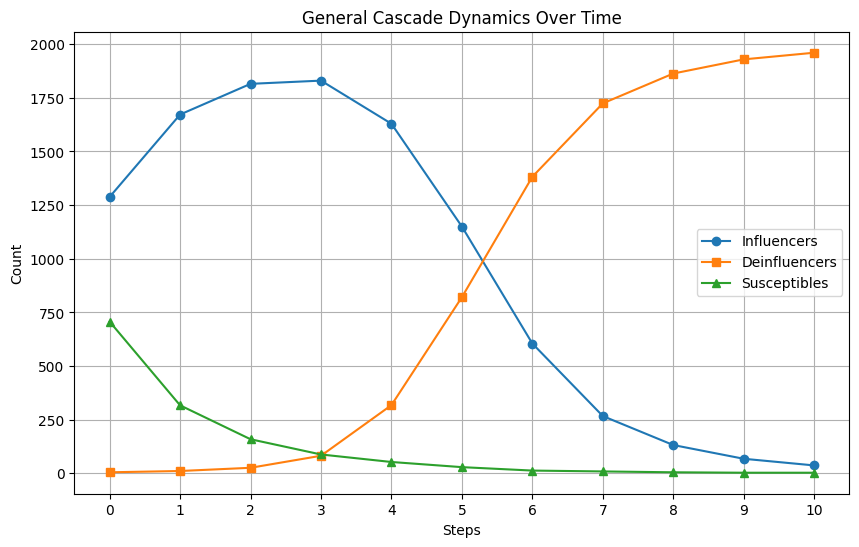

In [36]:
# Run the cascade and record the results
influencer_counts, deinfluencer_counts, susceptible_counts = ef.run_cascade_with_recording(model_fixed_influencers, num_deinfluencers=5, steps = 10)

# Plot the results
ef.plot_cascade_results(influencer_counts, deinfluencer_counts, susceptible_counts)